# Combining data from systems perturbations of link 2 to 9 removals

## Init

In [1]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path+'\src')
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\new-peak-project\src


In [2]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [3]:
import os 

### parameters 

notebook_name = 'systems_perturbation'
plot_figures = True
run_jobs = False
parallelise = True
save_figures = True

## Generation of ground truth model 

model_name = 'v3_small_model_52'
o_random_seed = 4
no_observable_species = 5
no_feedback_regulations = 2
specie_value_range = (5, 5000)
param_range = (0.1, 10)
param_multiplier_range = (0.7, 1.3)


## Simulation parameters 

simulation_time = 500 
simulation_step = 100

## Feature data generation 

feature_generation_method = 'uniform'
feature_generation_extra_params = {'min': 0.1, 'max': 10}
feature_generation_size = 1000 
feature_generation_seed = 50 # if -1 then 'o_random_seed' is used
if feature_generation_seed == -1:
    feature_generation_seed = o_random_seed
''' 
Options: 
- 'last_time_point' : only the last time point of the phosphorylated species is used
- 'dynamic_feature': computes the characteristic 'ten' dynamic feature for each specie data 
'''

## General parameters 
experiment_id = notebook_name + '_' + str(o_random_seed) + '_' + str(feature_generation_seed)
experiment_folder = config['DATA_PATH'] + '/' + experiment_id + '/'
if not os.path.exists(experiment_folder):
    os.makedirs(experiment_folder)
    
print(experiment_folder)

G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments/systems_perturbation_4_50/


## Loading data

In [4]:
import pandas as pd
import numpy as np

n_edges_removed = (2,9)
metric_dfs = {}
# read the pickle file 
for i in range(n_edges_removed[0], n_edges_removed[1]+1):
    metric_dfs[i] = pd.read_pickle(experiment_folder+str(i)+'rm_metric_df.pkl')

In [9]:
# concat the dataframes together, but give them an additional column to identify the model
# metric_df_2['exp_condition'] = '2 links removed'
# metric_df_3['exp_condition'] = '3 links removed'
# metric_df_4['exp_condition'] = '4 links removed'
for i in range(n_edges_removed[0], n_edges_removed[1]+1):
    metric_dfs[i]['exp_condition'] = str(i) + ' links removed'

metric_df_all = pd.concat([metric_dfs[i] for i in range(n_edges_removed[0], n_edges_removed[1]+1)], ignore_index=True)
metric_df_all

,Model,Feature Data,Mean Squared Error,R2 Score,Pearson Correlation,Pearson P-Value,exp_condition,Edges Removed
0,Linear Regression,Mock Omics Data (A+B),9.765032,0.544332,0.738797,8.875086e-36,2 links removed,NaN
1,Linear Regression,Mock Omics Data (A+B),6.739859,0.675590,0.822899,1.683062e-50,2 links removed,NaN
2,Linear Regression,Mock Omics Data (A+B),8.048785,0.640917,0.800968,5.453821e-46,2 links removed,NaN
3,Linear Regression,Mock Omics Data (A+B),8.750939,0.630894,0.796698,3.545023e-45,2 links removed,NaN
4,Linear Regression,Mock Omics Data (A+B),6.078354,0.703370,0.843334,2.651690e-55,2 links removed,NaN
...,...,...,...,...,...,...,...,...
4795,Neural Network,Last Point S9,0.389551,0.976315,0.988286,1.291167e-163,9 links removed,9.0
4796,Neural Network,Last Point S9,0.474077,0.975357,0.988593,9.431635e-165,9 links removed,9.0
4797,Neural Network,Last Point S9,0.333497,0.984040,0.992944,2.603763e-185,9 links removed,9.0
4798,Neural Network,Last Point S9,0.584609,0.975781,0.988295,1.193140e-163,9 links removed,9.0


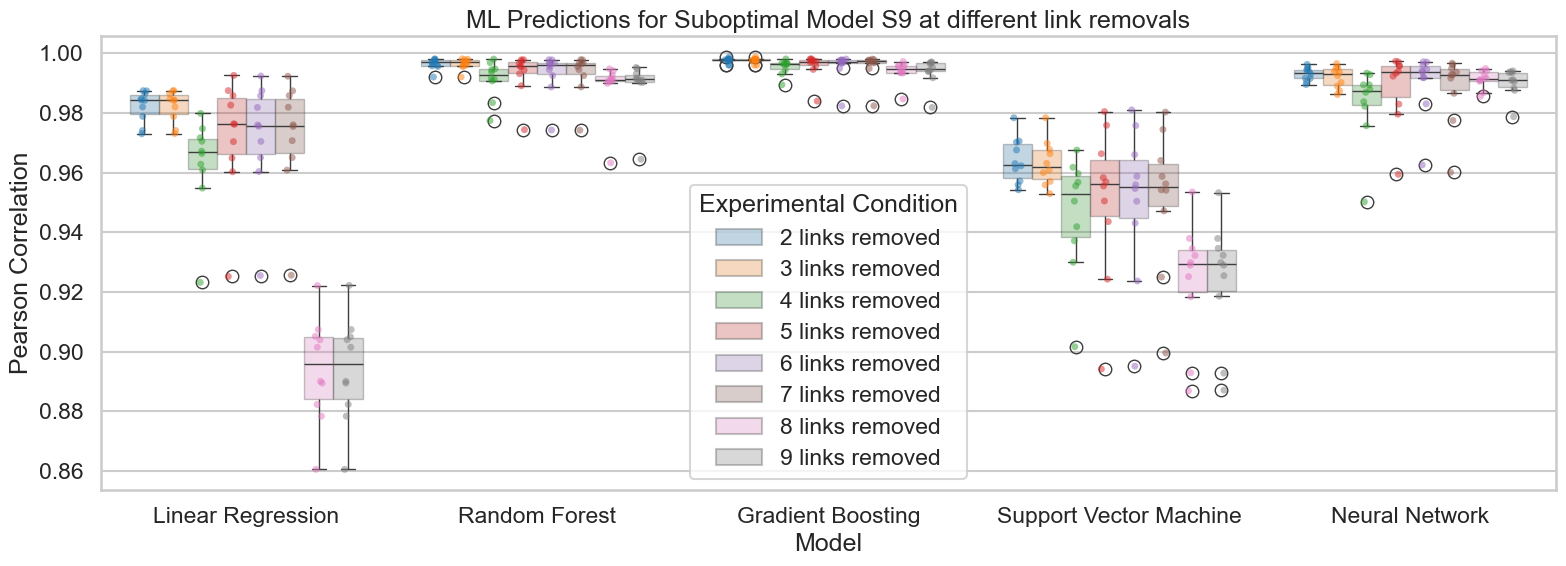

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualise the dataframe based on 'exp_condition' and 'Model', for when 'Feature Data' is 'Last Point S0'

metric_df_S0 = metric_df_all[metric_df_all['Feature Data'] == 'Last Point S4']
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(16, 6))
# do a stripplot to support the box plot
sns.stripplot(x='Model', y='Pearson Correlation', hue='exp_condition', data=metric_df_S0, dodge=True, alpha=0.5, legend=False)
sns.boxplot(x='Model', y='Pearson Correlation', hue='exp_condition', data=metric_df_S0)
# set alpha to 0.3 on the boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.3)
plt.title('ML Predictions for Suboptimal Model S9 at different link removals')
plt.ylabel('Pearson Correlation')
plt.xlabel('Model')
plt.legend(title='Experimental Condition')
plt.tight_layout()
# plt.savefig(experiment_folder+'pearson_correlation_boxplot.png')
plt.show()

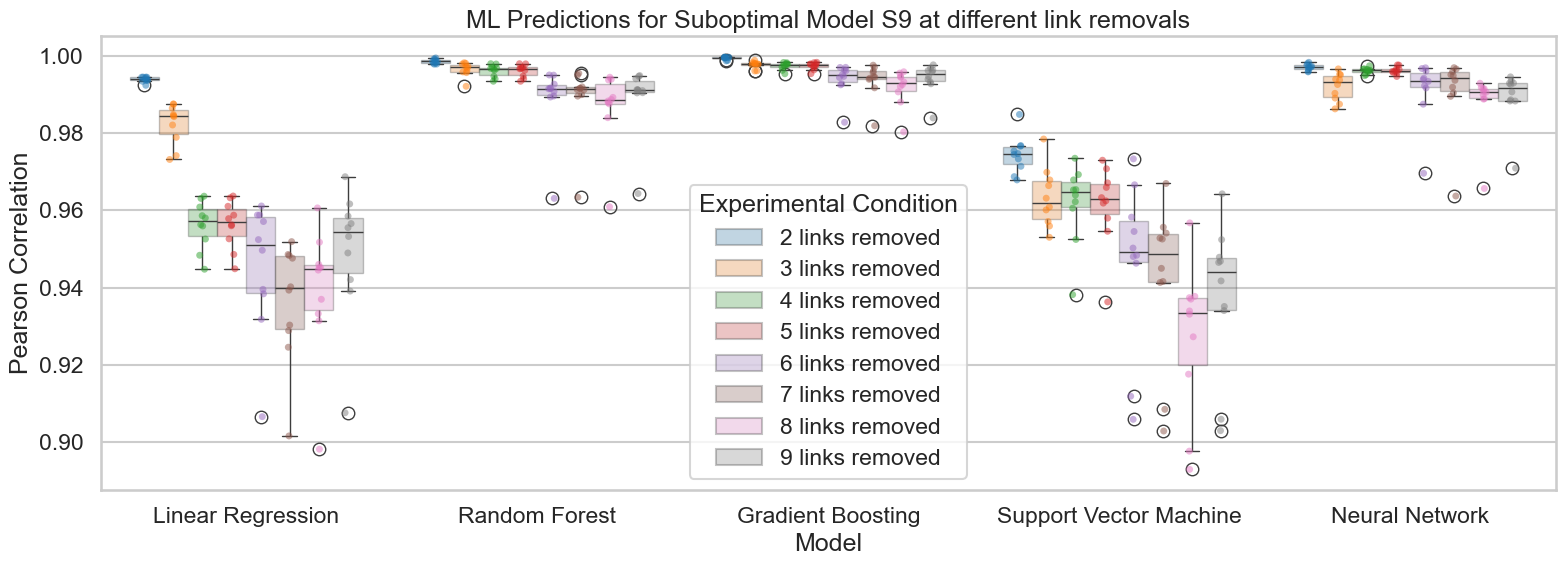

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualise the dataframe based on 'exp_condition' and 'Model', for when 'Feature Data' is 'Last Point S0'

metric_df_S0 = metric_df_all[metric_df_all['Feature Data'] == 'Last Point S9']
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(16, 6))
# do a stripplot to support the box plot
sns.stripplot(x='Model', y='Pearson Correlation', hue='exp_condition', data=metric_df_S0, dodge=True, alpha=0.5, legend=False)
sns.boxplot(x='Model', y='Pearson Correlation', hue='exp_condition', data=metric_df_S0)
# set alpha to 0.3 on the boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.3)
plt.title('ML Predictions for Suboptimal Model S9 at different link removals')
plt.ylabel('Pearson Correlation')
plt.xlabel('Model')
plt.legend(title='Experimental Condition')
plt.tight_layout()
# plt.savefig(experiment_folder+'pearson_correlation_boxplot.png')
plt.show()

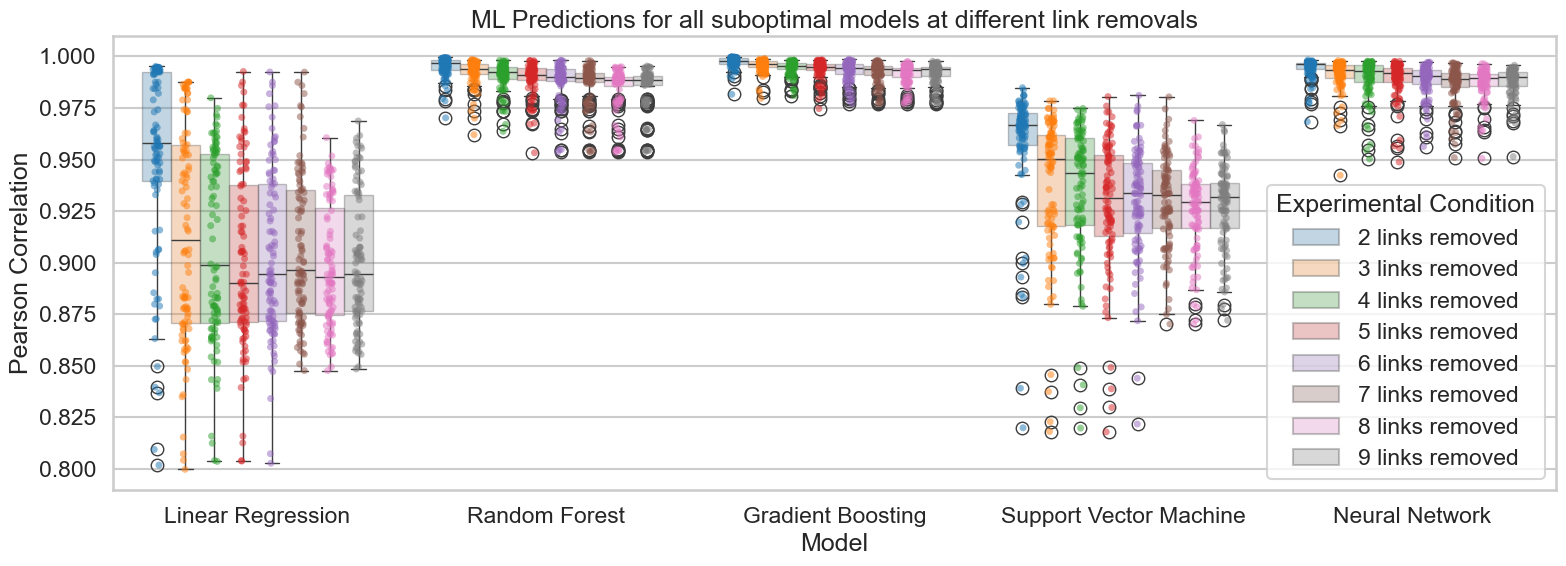

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualise the dataframe based on 'exp_condition' and 'Model', for when 'Feature Data' is 'Last Point S0'

metric_df_Sub = metric_df_all[metric_df_all['Feature Data'] != 'Mock Omics Data (A+B)']
metric_df_Sub_NoG0 = metric_df_Sub[metric_df_Sub['Feature Data'] != 'Last Point G0']
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(16, 6))
# do a stripplot to support the box plot
sns.stripplot(x='Model', y='Pearson Correlation', hue='exp_condition', data=metric_df_Sub_NoG0, dodge=True, alpha=0.5, legend=False)
sns.boxplot(x='Model', y='Pearson Correlation', hue='exp_condition', data=metric_df_Sub_NoG0)
# set alpha to 0.3 on the boxplot
for patch in plt.gca().patches:
    patch.set_alpha(0.3)
plt.title('ML Predictions for all suboptimal models at different link removals')
plt.ylabel('Pearson Correlation')
plt.xlabel('Model')
plt.legend(title='Experimental Condition')
plt.tight_layout()
# plt.savefig(experiment_folder+'pearson_correlation_boxplot.png')
plt.show()